# Machine Learning - Random Forest

### Goals: 
- Describe what the random forest is. 
- Test the random forest using the iris data for classification and regression. 

### What is the random forest? 

- The random forest is an ensemble method of classification and regression that generates multiple decision trees and picks the majority answer from those decision trees. 
- An easier way of thinking about the random forest is imagining you have an android phone and are considering switching to an iphone, so you call up a bunch of your friends and poll them. Some of your friends think iphones are better and some think androids are better. You poll their results and you find more people recommended to switch to an iphone so you make the switch.
    
### Why random forest?

- Simply put, it is a straightforward method of generating reasonable predictions. 

In [1]:
'''Random Forest Using Iris Data'''

# Loads the iris data
from sklearn.datasets import load_iris

dataset = load_iris() 
X = dataset.data
Y = dataset.target

In [2]:
# Creating a table for the iris data

from collections import OrderedDict
import pandas as pd

Iris_data = OrderedDict({'Sepal Length ': X[:,0],
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# First we need to train our model
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, Y_train, Y_test = train_test_split(X,Y)

In [4]:
len(Xd_train)

112

In [5]:
len(Xd_test)

38

In [6]:
# Classification Problem
from sklearn.ensemble import RandomForestClassifier

Cmodel = RandomForestClassifier()
Cmodel.fit(Xd_train, Y_train)
Cmodel.score(Xd_test,Y_test) # Out-of-bag error score

0.9473684210526315

Text(50.722222222222214, 0.5, 'Actual Iris type')

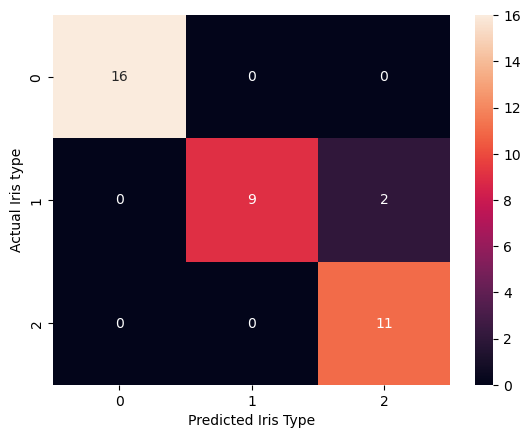

In [7]:
# We analyze the classification problem using a confusion matrix
# A confuction matrix compares the predicted values from testing to the actual values from the data. 
from sklearn.metrics import confusion_matrix

Y_predicted = Cmodel.predict(Xd_test)
cm = confusion_matrix(Y_test, Y_predicted)

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn # Heatmap plot

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Iris Type')
plt.ylabel('Actual Iris type')

In [8]:
# Regression Problem
from sklearn.ensemble import RandomForestRegressor

Rmodel = RandomForestRegressor()
Rmodel.fit(Xd_train, Y_train)
Rmodel.score(Xd_test,Y_test) # Out-of-bag error score

0.9376473526473527

In [9]:
# Analyzing using the explained variance score. 
# Measurement of regression similiar to R^2 in statistics
from sklearn.metrics import explained_variance_score

Y_predicted = Rmodel.predict(Xd_test)
evs = explained_variance_score(Y_test, Y_predicted)
print(evs)

0.9403015984015984
